# MNIST Fashion Dataset
**Scenario** - build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load the Fashion MNIST dataset

In [2]:
fmnist = tf.keras.datasets.fashion_mnist

The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown below.

*   0	---> T-shirt
*   1	---> Trouser
*   2	---> Pullover
*   3	---> Dress
*   4	---> Coat
*   5	---> Sandal
*   6	---> Shirt
*   7	---> Sneaker
*   8	---> Bag
*   9	---> Ankle boot



In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

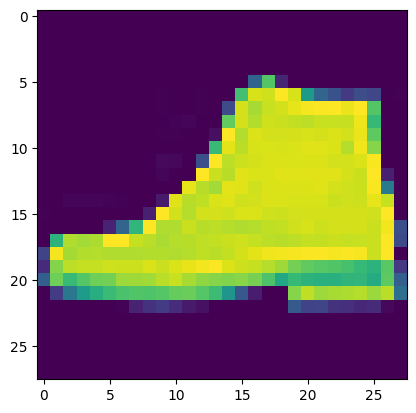

In [7]:
# Let's select a sample (0 to 59999)
index = 42

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

### Normalize the Images

In [8]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Build a model

### Designing the network

In [9]:
# Classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a sequence of layers in the neural network.

**Flatten**: Flatten just takes the 28x28 image matrix and turns it into a 1-dimensional array.

**Dense**: Adds a layer of neurons

**Activation Functions**: ReLU effectively means ->

```
if x > 0:
  return x

else:
  return 0
```

Which implies, it only passes values greater than 0 to the next layer in the network. Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. In other words it gives the individual class probabilities as an output. The example below shows how a softmax function output looks like.

In [11]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 5.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 5. 2.]]
output of softmax function: [[0.01521943 0.11245721 0.83095266 0.0413707 ]]
sum of outputs: 1.0
class with highest probability: 2


### Fit & Compile
Fitting the model over the training dataset and compliling it under a suitable choise of loss function and optimizer. In this case, the loss function is the '**sparse_categorical_crossentropy**', which is the best option for classification problems when there are two or more label classes.

'**Adam**', which is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments, is chosen as the optimizer.

In [12]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4973 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3741 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2932 - accuracy: 0.8915


## Evaluate the model performance
For a good understanding on the performance of the model, it is best to start with the how the model performs over the testset images.

In [14]:
# Evaluate the model on unseen data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Testset Loss :", test_loss)
print("Testset Accuracy :", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8743
Testset Loss : 0.3457286059856415
Testset Accuracy : 0.8743000030517578


## Testing a test sample to check what the model predicts
To better understand what is being predicted by the model, lets test a sample from the testset. Selecting the image with *index[0]* from *test_images*, the model predicts the folowing output, stored in the variable *classification*.

In [15]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[3.6260702e-05 1.4104130e-08 2.0248437e-07 5.7167857e-09 2.2530310e-07 1.0012436e-03 4.5674182e-07 2.0052755e-02 1.8344207e-04 9.7872543e-01]


The output generates the predicted probability of individual classes. By going through the output array, its clear that the 10th label has the highest probability, which implies that the model predicts the selected image to be an **Ankle Boot**. For better understanding, below is the predicted test label.

Predicted test label of the image : 9


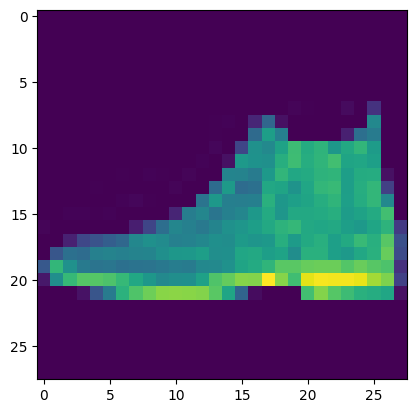

In [20]:
print('Predicted test label of the image :',test_labels[0])
plt.imshow(test_images[0])
plt.show()

## Using Callbacks to control traing

In the below discussion, we test out the use of two metrics for callbacks, Loss and Accuracy

### Stopping training when a specified accuracy is met:

In [50]:
class myCallback_acc(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    #Check the accuracy
    if(logs.get('accuracy') >= 0.85):

      # Stop if threshold is met
      print("\nAccuracy is greater than 0.85 so cancelling training!")
      self.model.stop_training = True

In [47]:
# Instantiate class
callbacks = myCallback_acc()

In [48]:
# Define the model as model_cal_1
model_cal_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [49]:
# Compile the model
model_cal_1.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a callback
model_cal_1.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4968 - accuracy: 0.8265
Epoch 2/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.3758 - accuracy: 0.8639
Accuracy is greater than 0.85 so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3759 - accuracy: 0.8639


The model stopped the training once the accuracy reached a value greater than or equal to 0.85 in its 2nd epoch.

### Stopping training when specfified Loss is met:

In [51]:
class myCallback_loss(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    #Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

In [52]:
# Instantiate class
callbacks = myCallback_loss()

In [53]:
# Define the model as model_cal_2
model_cal_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [54]:
# Compile the model
model_cal_2.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a callback
model_cal_2.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5004 - accuracy: 0.8252
Epoch 2/5
1864/1875 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.8658
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8659


The model stopped the training once the loss reached a value lower than to 0.4 in its 2nd epoch. The choice of the metric depends on the type of probelm one chooses to solve. It is best to introducing a validation set along with training set for supirior results.